In [45]:
import numpy as np
import copy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

#import sys
#sys.path.append('../Plotting/plottingHelpersIris')
#import makePlots as ph
%matplotlib inline

In [46]:
prediktoren = pd.read_csv('../predictors_landkreise_mit_mobilitaet.csv')

In [47]:
key = prediktoren.loc[:, 'Schluessel']
area = prediktoren.loc[:, 'Fläche']
population = prediktoren.loc[:, 'Bevölkerung(2018)']
name = prediktoren.loc[:, 'Name']

In [48]:
area=area.str.replace(" ","")
population=population.str.replace(" ","")

In [49]:
area = pd.to_numeric(area)
population = pd.to_numeric(population)

In [50]:
population_density = population / area

In [51]:
timeseries = pd.read_csv('../data_landkreise/data_landkreise_2020-03-21.csv')


In [52]:
# interesting columns: Landkreis, AnzahlFall, AnzahlTodesfall, Meldedatum

heinsberg = timeseries[timeseries['Landkreis'] == 'LK Heinsberg']
koeln = timeseries[timeseries['Landkreis'] == 'SK Köln']
aachen = timeseries[timeseries['Landkreis'] == 'StadtRegion Aachen']
dueren = timeseries[timeseries['Landkreis'] == 'LK Düren']

# aggregate per day

In [53]:
aggregation_functions = {'id': 'first' ,'Meldedatum': 'first', 'AnzahlFall': 'sum', 'AnzahlTodesfall': 'sum'}
dueren_a = dueren.groupby(dueren['Meldedatum']).aggregate(aggregation_functions)
heinsberg_a = heinsberg.groupby(heinsberg['Meldedatum']).aggregate(aggregation_functions)
koeln_a = koeln.groupby(koeln['Meldedatum']).aggregate(aggregation_functions)
aachen_a = aachen.groupby(aachen['Meldedatum']).aggregate(aggregation_functions)

In [54]:
dueren_a['Meldedatum'] = dueren_a['Meldedatum'].str.slice(start=5, stop=10)
heinsberg_a['Meldedatum'] = heinsberg_a['Meldedatum'].str.slice(start=5, stop=10)
koeln_a['Meldedatum'] = koeln_a['Meldedatum'].str.slice(start=5, stop=10)
aachen_a['Meldedatum'] = aachen_a['Meldedatum'].str.slice(start=5, stop=10)

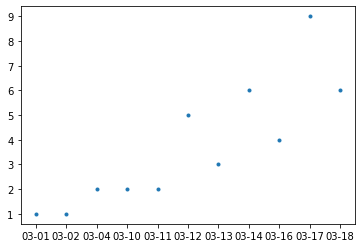

In [55]:
plt.plot(dueren_a['Meldedatum'],dueren_a['AnzahlFall'],'.')

# cumulative sum

In [56]:
dueren_ct = dueren_a
dueren_ct['AnzahlFall'] = dueren_a['AnzahlFall'].cumsum()
dueren_ct['AnzahlTodesfall'] = dueren_a['AnzahlTodesfall'].cumsum()

In [57]:
heinsberg_ct = heinsberg_a
heinsberg_ct['AnzahlFall'] = heinsberg_a['AnzahlFall'].cumsum()
heinsberg_ct['AnzahlTodesfall'] = heinsberg_a['AnzahlTodesfall'].cumsum()

In [58]:
koeln_ct = koeln_a
koeln_ct['AnzahlFall'] = koeln_a['AnzahlFall'].cumsum()
koeln_ct['AnzahlTodesfall'] = koeln_a['AnzahlTodesfall'].cumsum()

In [59]:
aachen_ct = aachen_a
aachen_ct['AnzahlFall'] = aachen_a['AnzahlFall'].cumsum()
aachen_ct['AnzahlTodesfall'] = aachen_a['AnzahlTodesfall'].cumsum()

In [62]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

fname = '../logo/landkreise-in-germany.shp'

#ax = plt.axes(projection=ccrs.PlateCarree())
#shape_feature = ShapelyFeature(Reader(fname).geometries(),ccrs.PlateCarree(), edgecolor='black')
#ax.add_feature(shape_feature)
#ax.add_feature(shape_feature, facecolor='blue')
#plt.show()

In [63]:
import cartopy.io.shapereader as shpreader

reader = shpreader.Reader(fname)
records= reader.records()
geos= reader.geometries()
record = next(records)
#print(record.attributes)
#print(record.attributes['name_2'])

In [64]:
nrw = []
g = next(geos)
for x in records:
    g = next(geos)
    if x.attributes['name_1'] == 'Nordrhein-Westfalen':
#        print(x.attributes['name_2'])
        nrw.append(copy.deepcopy(g))
    if x.attributes['name_2'] == 'Städteregion Aachen':
        aachen_shape = copy.deepcopy(g)
    if x.attributes['name_2'] == 'Köln':
        koeln_shape = copy.deepcopy(g)
    if x.attributes['name_2'] == 'Heinsberg':
        heinsberg_shape = copy.deepcopy(g)
    if x.attributes['name_2'] == 'Düren':
        dueren_shape = copy.deepcopy(g)
#    print(x.attributes['name_2'])Heinsberg

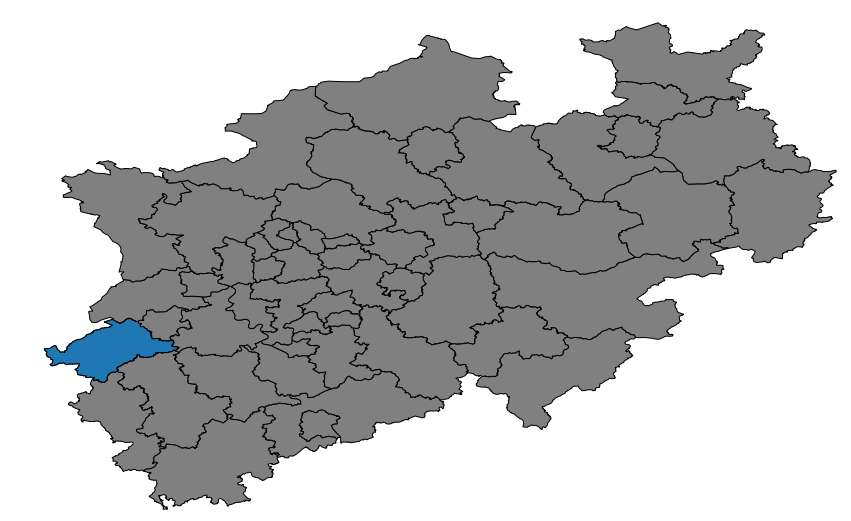

In [65]:
fig = plt.figure(figsize = (15, 15))
ax = plt.axes(projection=ccrs.OSNI())
#shape_feature = ShapelyFeature(Reader(fname).geometries(),ccrs.OSNI(), edgecolor='black')
#ax.add_feature(shape_feature,facecolor='white')

for i in range(len(nrw)):
    shape_feature = ShapelyFeature(nrw[i],ccrs.OSNI(), edgecolor='black')
    ax.add_feature(shape_feature, facecolor='grey')
shape_feature = ShapelyFeature(heinsberg_shape,ccrs.OSNI(), edgecolor='black')
ax.add_feature(shape_feature)
ax.set_extent([5.7, 9.5, 50.3, 52.6], crs=ccrs.OSNI())
plt.gca().outline_patch.set_visible(False)
plt.show()


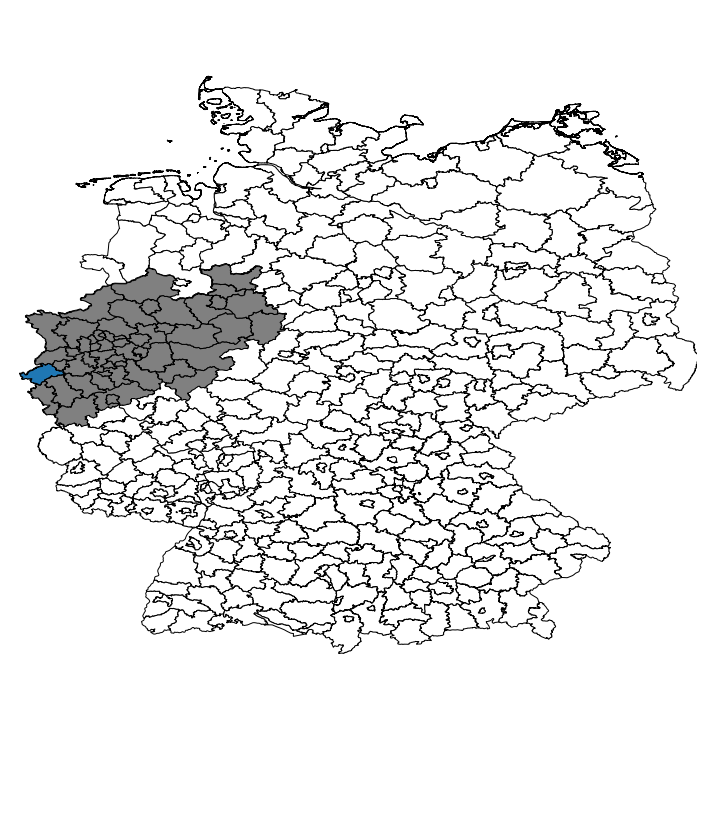

In [66]:
fig = plt.figure(figsize = (15, 15))
ax = plt.axes(projection=ccrs.OSNI())
shape_feature = ShapelyFeature(Reader(fname).geometries(),ccrs.OSNI(), edgecolor='black')
ax.add_feature(shape_feature,facecolor='white')

for i in range(len(nrw)):
    shape_feature = ShapelyFeature(nrw[i],ccrs.OSNI(), edgecolor='black')
    ax.add_feature(shape_feature, facecolor='grey')
shape_feature = ShapelyFeature(heinsberg_shape,ccrs.OSNI(), edgecolor='black')
ax.add_feature(shape_feature)
ax.set_extent([5.7, 15, 45, 56], crs=ccrs.OSNI())
plt.gca().outline_patch.set_visible(False)
plt.show()


In [67]:
heinsberg_t = range(1,23)
aachen_t = np.arange(3,7).tolist() + np.arange(8,21).tolist()
koeln_t = np.arange(4,8).tolist() + np.arange(9,11).tolist() + np.arange(13,14).tolist() + np.arange(15,22).tolist()
dueren_t = np.arange(5,7).tolist() + np.arange(8,9).tolist() + np.arange(14,19).tolist() + np.arange(20,23).tolist()

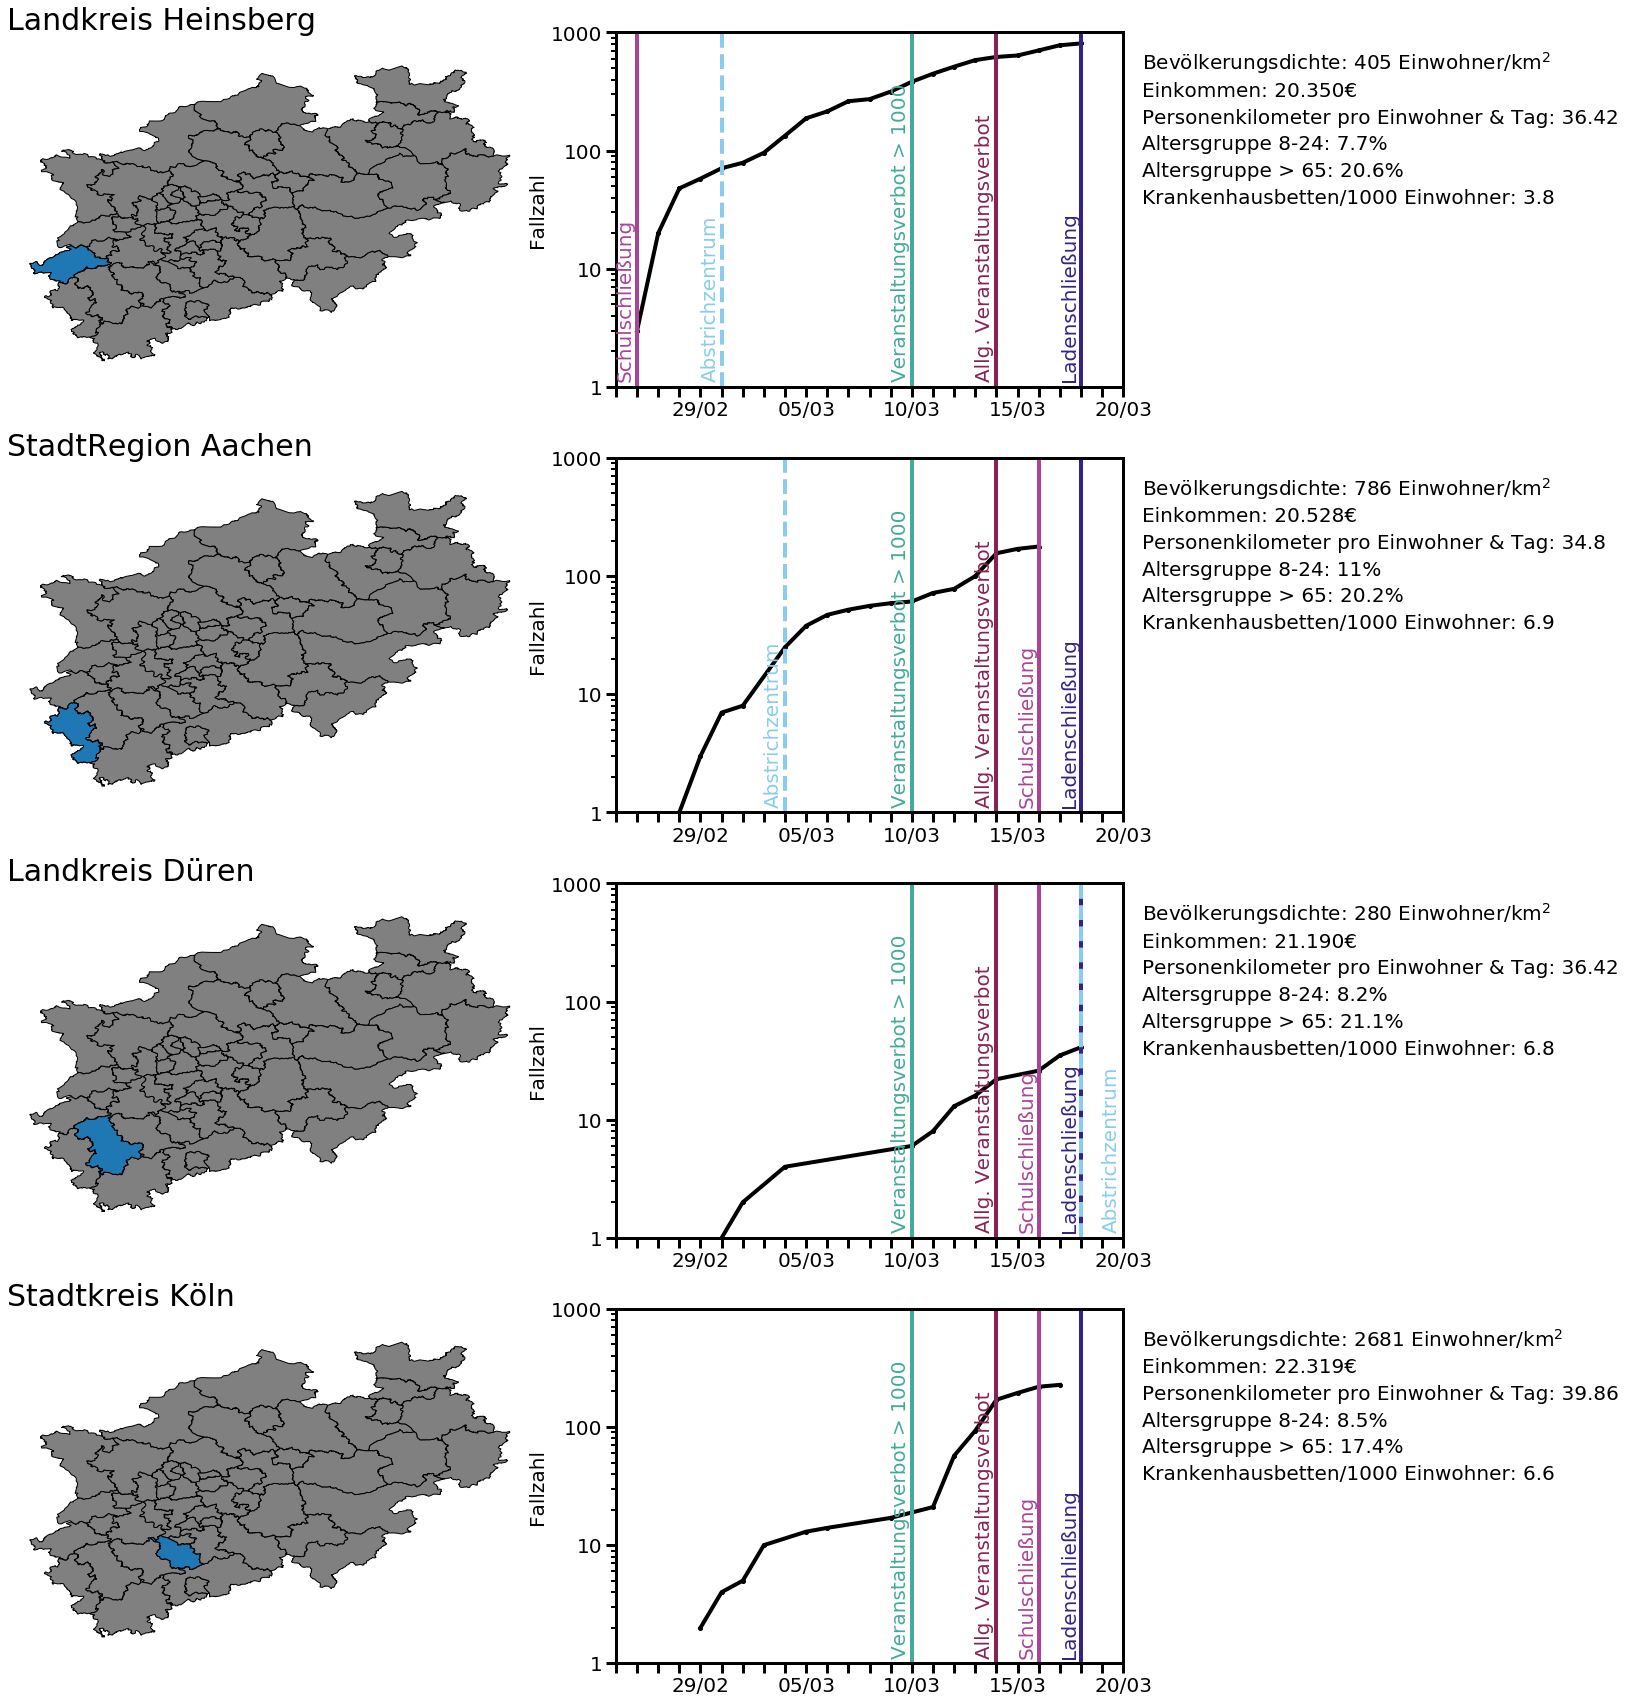

In [69]:
matplotlib.rcParams['figure.figsize'] = (20,30)
fig = plt.figure()

gs = matplotlib.gridspec.GridSpec(4,2)

#xticks=[4,9,15,19,24]
#xticklabels=['29.02.','05.03.','10.03.','15.03','20.03']
xticks=range(0,25)
xticklabels=['','','','','29/02','','','','','05/03','','','','','10/03','','','','','15/03','','','','','20/03']
yticks=[1,10,100,1000]

ax = plt.subplot(gs[0],projection=ccrs.OSNI())
for i in range(len(nrw)):
    shape_feature = ShapelyFeature(nrw[i],ccrs.OSNI(), edgecolor='black')
    ax.add_feature(shape_feature, facecolor='grey')
shape_feature = ShapelyFeature(heinsberg_shape,ccrs.OSNI(), edgecolor='black')
ax.add_feature(shape_feature)
ax.set_extent([5.7, 9.5, 50.3, 52.6], crs=ccrs.OSNI())
plt.gca().outline_patch.set_visible(False)
plt.text(5.7, 52.8, 'Landkreis Heinsberg', color='k', fontsize=30)
plt.text(14.2, 52.5, r'Bevölkerungsdichte: 405 Einwohner/km$^2$', color='k', fontsize=20)
plt.text(14.2, 52.3, 'Einkommen: 20.350€', color='k', fontsize=20)
plt.text(14.2, 52.1, 'Personenkilometer pro Einwohner & Tag: 36.42', color='k', fontsize=20)
plt.text(14.2, 51.9, 'Altersgruppe 8-24: 7.7%', color='k', fontsize=20)
plt.text(14.2, 51.7, 'Altersgruppe > 65: 20.6%', color='k', fontsize=20)
plt.text(14.2, 51.5, 'Krankenhausbetten/1000 Einwohner: 3.8', color='k', fontsize=20)

ax = plt.subplot(gs[1])
ax.plot(heinsberg_t,heinsberg_ct['AnzahlFall'],'.-',lw=4,ms=8,color='k')
ax.set_yscale('log')
ax.set_xlim(0,24)
ax.set_ylim(1,1000)
ax.axvline(x=1, color='#aa4499', lw=4, fillstyle='bottom')#, ymin=vlineLim[i][j][0], ymax=vlineLim[i][j][1], clip_on=vlineClip[i][j])
plt.text(0, 1.2, 'Schulschließung', color='#aa4499', fontsize=20,rotation='vertical')
ax.axvline(x=22, color='#332288', lw=4, fillstyle='bottom')#, ymin=vlineLim[i][j][0], ymax=vlineLim[i][j][1], clip_on=vlineClip[i][j])
plt.text(21, 1.2, 'Ladenschließung', color='#332288', fontsize=20,rotation='vertical')
ax.axvline(x=14, color='#44aa99', lw=4, fillstyle='bottom')#, ymin=vlineLim[i][j][0], ymax=vlineLim[i][j][1], clip_on=vlineClip[i][j])
plt.text(13, 1.2, 'Veranstaltungsverbot > 1000', color='#44aa99', fontsize=20,rotation='vertical')
ax.axvline(x=18, color='#882255', lw=4, fillstyle='bottom')#, ymin=vlineLim[i][j][0], ymax=vlineLim[i][j][1], clip_on=vlineClip[i][j])
plt.text(17, 1.2, 'Allg. Veranstaltungsverbot', color='#882255', fontsize=20,rotation='vertical')
ax.axvline(x=5, color='#88ccee', lw=4, fillstyle='bottom',linestyle='--')#, ymin=vlineLim[i][j][0], ymax=vlineLim[i][j][1], clip_on=vlineClip[i][j])
plt.text(4, 1.2, 'Abstrichzentrum', color='#88ccee', fontsize=20,rotation='vertical')
ax.xaxis.set_ticks(xticks)
ax.set_xticklabels(xticklabels,fontsize=20)
ax.yaxis.set_ticks(yticks)
ax.set_yticklabels(yticks,fontsize=20)
ax.spines['top'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.tick_params(axis='x', length=10, width=3, color = 'k', direction = 'out')
ax.tick_params(axis='y', length=10, width=3, color = 'k', direction = 'out')
ax.tick_params(which='minor', width=2, length=5)
ax.set_ylabel('Fallzahl', fontsize=20, color='k')

####AACHEN
ax = plt.subplot(gs[2],projection=ccrs.OSNI())
for i in range(len(nrw)):
    shape_feature = ShapelyFeature(nrw[i],ccrs.OSNI(), edgecolor='black')
    ax.add_feature(shape_feature, facecolor='grey')
shape_feature = ShapelyFeature(aachen_shape,ccrs.OSNI(), edgecolor='black')
ax.add_feature(shape_feature)
ax.set_extent([5.7, 9.5, 50.3, 52.6], crs=ccrs.OSNI())
plt.gca().outline_patch.set_visible(False)
plt.text(5.7, 52.8, 'StadtRegion Aachen', color='k', fontsize=30)
plt.text(14.2, 52.5, r'Bevölkerungsdichte: 786 Einwohner/km$^2$', color='k', fontsize=20)
plt.text(14.2, 52.3, 'Einkommen: 20.528€', color='k', fontsize=20)
plt.text(14.2, 52.1, 'Personenkilometer pro Einwohner & Tag: 34.8', color='k', fontsize=20)
plt.text(14.2, 51.9, 'Altersgruppe 8-24: 11%', color='k', fontsize=20)
plt.text(14.2, 51.7, 'Altersgruppe > 65: 20.2%', color='k', fontsize=20)
plt.text(14.2, 51.5, 'Krankenhausbetten/1000 Einwohner: 6.9', color='k', fontsize=20)

ax = plt.subplot(gs[3])
ax.plot(aachen_t,aachen_ct['AnzahlFall'],'.-',lw=4,ms=8,color='k')
ax.set_yscale('log')
ax.set_xlim(0,24)
ax.set_ylim(1,1000)
ax.xaxis.set_ticks(xticks)
ax.set_xticklabels(xticklabels,fontsize=20)
ax.axvline(x=20, color='#aa4499', lw=4, fillstyle='bottom')#, ymin=vlineLim[i][j][0], ymax=vlineLim[i][j][1], clip_on=vlineClip[i][j])0
plt.text(19, 1.2, 'Schulschließung', color='#aa4499', fontsize=20,rotation='vertical')
ax.axvline(x=22, color='#332288', lw=4, fillstyle='bottom')#, ymin=vlineLim[i][j][0], ymax=vlineLim[i][j][1], clip_on=vlineClip[i][j])
plt.text(21, 1.2, 'Ladenschließung', color='#332288', fontsize=20,rotation='vertical')
ax.axvline(x=14, color='#44aa99', lw=4, fillstyle='bottom')#, ymin=vlineLim[i][j][0], ymax=vlineLim[i][j][1], clip_on=vlineClip[i][j])
plt.text(13, 1.2, 'Veranstaltungsverbot > 1000', color='#44aa99', fontsize=20,rotation='vertical')
ax.axvline(x=18, color='#882255', lw=4, fillstyle='bottom')#, ymin=vlineLim[i][j][0], ymax=vlineLim[i][j][1], clip_on=vlineClip[i][j])
plt.text(17, 1.2, 'Allg. Veranstaltungsverbot', color='#882255', fontsize=20,rotation='vertical')
ax.axvline(x=8, color='#88ccee', lw=4, fillstyle='bottom',linestyle='--')#, ymin=vlineLim[i][j][0], ymax=vlineLim[i][j][1], clip_on=vlineClip[i][j])
plt.text(7, 1.2, 'Abstrichzentrum', color='#88ccee', fontsize=20,rotation='vertical')

ax.yaxis.set_ticks(yticks)
ax.set_yticklabels(yticks,fontsize=20)
ax.spines['top'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.tick_params(axis='x', length=10, width=3, color = 'k', direction = 'out')
ax.tick_params(axis='y', length=10, width=3, color = 'k', direction = 'out')
ax.tick_params(which='minor', width=2, length=5)
ax.set_ylabel('Fallzahl', fontsize=20, color='k')

#### DÜREN
ax = plt.subplot(gs[4],projection=ccrs.OSNI())
for i in range(len(nrw)):
    shape_feature = ShapelyFeature(nrw[i],ccrs.OSNI(), edgecolor='black')
    ax.add_feature(shape_feature, facecolor='grey')
shape_feature = ShapelyFeature(dueren_shape,ccrs.OSNI(), edgecolor='black')
ax.add_feature(shape_feature)
ax.set_extent([5.7, 9.5, 50.3, 52.6], crs=ccrs.OSNI())
plt.gca().outline_patch.set_visible(False)
plt.text(5.7, 52.8, 'Landkreis Düren', color='k', fontsize=30)
plt.text(14.2, 52.5, r'Bevölkerungsdichte: 280 Einwohner/km$^2$', color='k', fontsize=20)
plt.text(14.2, 52.3, 'Einkommen: 21.190€', color='k', fontsize=20)
plt.text(14.2, 52.1, 'Personenkilometer pro Einwohner & Tag: 36.42', color='k', fontsize=20)
plt.text(14.2, 51.9, 'Altersgruppe 8-24: 8.2%', color='k', fontsize=20)
plt.text(14.2, 51.7, 'Altersgruppe > 65: 21.1%', color='k', fontsize=20)
plt.text(14.2, 51.5, 'Krankenhausbetten/1000 Einwohner: 6.8', color='k', fontsize=20)

ax = plt.subplot(gs[5])
ax.plot(dueren_t,dueren_ct['AnzahlFall'],'.-',lw=4,ms=8,color='k')
ax.set_yscale('log')
ax.set_xlim(0,24)
ax.set_ylim(1,1000)
ax.xaxis.set_ticks(xticks)
ax.set_xticklabels(xticklabels,fontsize=20)
ax.axvline(x=20, color='#aa4499', lw=4, fillstyle='bottom')#, ymin=vlineLim[i][j][0], ymax=vlineLim[i][j][1], clip_on=vlineClip[i][j])
plt.text(19, 1.2, 'Schulschließung', color='#aa4499', fontsize=20,rotation='vertical')
ax.axvline(x=22, color='#332288', lw=4, fillstyle='bottom')#, ymin=vlineLim[i][j][0], ymax=vlineLim[i][j][1], clip_on=vlineClip[i][j])
plt.text(21, 1.2, 'Ladenschließung', color='#332288', fontsize=20,rotation='vertical')
ax.axvline(x=14, color='#44aa99', lw=4, fillstyle='bottom')#, ymin=vlineLim[i][j][0], ymax=vlineLim[i][j][1], clip_on=vlineClip[i][j])
plt.text(13, 1.2, 'Veranstaltungsverbot > 1000', color='#44aa99', fontsize=20,rotation='vertical')
ax.axvline(x=18, color='#882255', lw=4, fillstyle='bottom')#, ymin=vlineLim[i][j][0], ymax=vlineLim[i][j][1], clip_on=vlineClip[i][j])
plt.text(17, 1.2, 'Allg. Veranstaltungsverbot', color='#882255', fontsize=20,rotation='vertical')
ax.axvline(x=22, color='#88ccee', lw=4, fillstyle='bottom',linestyle='--')#, ymin=vlineLim[i][j][0], ymax=vlineLim[i][j][1], clip_on=vlineClip[i][j])
plt.text(23, 1.2, 'Abstrichzentrum', color='#88ccee', fontsize=20,rotation='vertical')

ax.yaxis.set_ticks(yticks)
ax.set_yticklabels(yticks,fontsize=20)
ax.spines['top'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.tick_params(axis='x', length=10, width=3, color = 'k', direction = 'out')
ax.tick_params(axis='y', length=10, width=3, color = 'k', direction = 'out')
ax.tick_params(which='minor', width=2, length=5)
ax.set_ylabel('Fallzahl', fontsize=20, color='k')

####KÖLN
ax = plt.subplot(gs[6],projection=ccrs.OSNI())
for i in range(len(nrw)):
    shape_feature = ShapelyFeature(nrw[i],ccrs.OSNI(), edgecolor='black')
    ax.add_feature(shape_feature, facecolor='grey')
shape_feature = ShapelyFeature(koeln_shape,ccrs.OSNI(), edgecolor='black')
ax.add_feature(shape_feature)
ax.set_extent([5.7, 9.5, 50.3, 52.6], crs=ccrs.OSNI())
plt.gca().outline_patch.set_visible(False)
plt.text(5.7, 52.8, 'Stadtkreis Köln', color='k', fontsize=30)
plt.text(14.2, 52.5, r'Bevölkerungsdichte: 2681 Einwohner/km$^2$', color='k', fontsize=20)
plt.text(14.2, 52.3, 'Einkommen: 22.319€', color='k', fontsize=20)
plt.text(14.2, 52.1, 'Personenkilometer pro Einwohner & Tag: 39.86', color='k', fontsize=20)
plt.text(14.2, 51.9, 'Altersgruppe 8-24: 8.5%', color='k', fontsize=20)
plt.text(14.2, 51.7, 'Altersgruppe > 65: 17.4%', color='k', fontsize=20)
plt.text(14.2, 51.5, 'Krankenhausbetten/1000 Einwohner: 6.6', color='k', fontsize=20)

ax = plt.subplot(gs[7])
ax.plot(koeln_t,koeln_ct['AnzahlFall'],'.-',lw=4,ms=8,color='k')
ax.set_yscale('log')
ax.set_xlim(0,24)
ax.set_ylim(1,1000)
ax.axvline(x=20, color='#aa4499', lw=4, fillstyle='bottom')#, ymin=vlineLim[i][j][0], ymax=vlineLim[i][j][1], clip_on=vlineClip[i][j])
plt.text(19, 1.2, 'Schulschließung', color='#aa4499', fontsize=20,rotation='vertical')
ax.axvline(x=22, color='#332288', lw=4, fillstyle='bottom')#, ymin=vlineLim[i][j][0], ymax=vlineLim[i][j][1], clip_on=vlineClip[i][j])
plt.text(21, 1.2, 'Ladenschließung', color='#332288', fontsize=20,rotation='vertical')
ax.axvline(x=14, color='#44aa99', lw=4, fillstyle='bottom')#, ymin=vlineLim[i][j][0], ymax=vlineLim[i][j][1], clip_on=vlineClip[i][j])
plt.text(13, 1.2, 'Veranstaltungsverbot > 1000', color='#44aa99', fontsize=20,rotation='vertical')
ax.axvline(x=18, color='#882255', lw=4, fillstyle='bottom')#, ymin=vlineLim[i][j][0], ymax=vlineLim[i][j][1], clip_on=vlineClip[i][j])
plt.text(17, 1.2, 'Allg. Veranstaltungsverbot', color='#882255', fontsize=20,rotation='vertical')
#ax.axvline(x=20, color='#88ccee', lw=4, fillstyle='bottom')#, ymin=vlineLim[i][j][0], ymax=vlineLim[i][j][1], clip_on=vlineClip[i][j])
#plt.text(19, 45, 'dezidiertes Abstrichzentrum', color='#88ccee', fontsize=20,rotation='vertical')
ax.xaxis.set_ticks(xticks)
ax.set_xticklabels(xticklabels,fontsize=20)
ax.yaxis.set_ticks(yticks)
ax.set_yticklabels(yticks,fontsize=20)
ax.spines['top'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.tick_params(axis='x', length=10, width=3, color = 'k', direction = 'out')
ax.tick_params(axis='y', length=10, width=3, color = 'k', direction = 'out')
ax.tick_params(which='minor', width=2, length=5)
ax.set_ylabel('Fallzahl', fontsize=20, color='k')

#plt.grid(True)

fig.savefig('case_study_landkreise.pdf', bbox_inches='tight')
fig.savefig('case_study_landkreise.png', bbox_inches='tight')
plt.show()

In [61]:
aachen_ct['AnzahlFall']

Meldedatum
2020-02-28 01:00:00      1
2020-02-29 01:00:00      3
2020-03-01 01:00:00      7
2020-03-02 01:00:00      8
2020-03-04 01:00:00     25
2020-03-05 01:00:00     38
2020-03-06 01:00:00     47
2020-03-07 01:00:00     52
2020-03-08 01:00:00     56
2020-03-09 01:00:00     59
2020-03-10 01:00:00     61
2020-03-11 01:00:00     72
2020-03-12 01:00:00     78
2020-03-13 01:00:00    100
2020-03-14 01:00:00    156
2020-03-15 01:00:00    170
2020-03-16 01:00:00    178
Name: AnzahlFall, dtype: int64